In [34]:
nasdaq_tickers = ['MRNA',  # Moderna, Inc.
                  'DLTR',  # Dollar Tree, Inc.
                  'ZS',    # Zscaler, Inc.    
                  'MCHP',  # Microchip Technology Incorporated
                  'SBUX',  # Starbucks Corporation
                  'HON', # Honeywell International Inc.
                  'JD',  # JD.com, Inc.
                  'DDOG',  # Datadog, Inc.
                  'AMAT',  # Applied Materials, Inc.
                  'AAPL',  # Apple Inc.
                  'AMGN',  # Amgen Inc.
                  'INTU',  # Intuit Inc.
                  'PCAR',  # PACCAR Inc
                  'MDLZ',  # Mondelez International, Inc.
                  'CSGP',  # CoStar Group, Inc.
                  'FTNT',  # Fortinet, Inc.
                  'KDP',  # Keurig Dr Pepper Inc.
                  'META',  # Meta Platforms, Inc.
                  'VRSK',  # Verisk Analytics, Inc.
                  'MAR',  # Marriott International, Inc.
                  'MRVL',  # Marvell Technology, Inc.
                  'AZN',  # AstraZeneca PLC
                  'ILMN',  # Illumina, Inc.
                  'ENPH',  # Enphase Energy, Inc.
                  'SIRI',  # Sirius XM Holdings Inc.
                  'MELI',  # MercadoLibre, Inc.
                  'ZM',   # Zoom Video Communications, Inc.
                  'TSLA',  # Tesla, Inc.
                  'BKR',   # Baker Hughes Company
                  'URBN'   # Urban Outfitters, Inc.
                 ]
start = '2021-01-01'
end = '2023-10-01'

In [38]:
import yfinance as yf 
nas = yf.download(tickers = nasdaq_tickers, start=start, end=end, 
                  actions = False)

[*********************100%***********************]  30 of 30 completed


In [40]:
nas.head()

Price            Close                                               \
Ticker            AAPL       AMAT        AMGN        AZN        BKR   
Date                                                                  
2021-01-04  126.239708  83.592606  196.605728  45.389843  18.684303   
2021-01-05  127.800491  86.219604  197.559830  45.551567  18.897636   
2021-01-06  123.498535  87.403214  202.321915  45.740238  19.697630   
2021-01-07  127.712685  90.992462  202.989807  45.093353  20.150957   
2021-01-08  128.815033  91.954750  206.867111  45.695324  19.973181   

Price                                                             ...  \
Ticker           CSGP       DDOG        DLTR        ENPH    FTNT  ...   
Date                                                              ...   
2021-01-04  89.526001  91.230003  106.940002  172.240005  29.112  ...   
2021-01-05  89.379997  93.029999  107.129997  181.479996  28.348  ...   
2021-01-06  89.669998  91.330002  112.970001  203.380005  27.622  ...   
2021-01-07  90.547997  96.639999  114.750000  213.759995  28.650  ...   
2021-01-08  91.952003  99.940002  112.970001  207.410004  29.628  ...   

Price         Volume                                                           \
Ticker          MRNA      MRVL     PCAR     SBUX     SIRI       TSLA     URBN   
Date                                                                            
2021-01-04  22439600  11418600  2526300  8041500  3520510  145914600  1906700   
2021-01-05  15450800   5710100  1727250  5721900  2881190   96735600  1819400   
2021-01-06  21590900   6516400  3052950  5017200  3732660  134100000  2662500   
2021-01-07  20614100   9090400  2577900  5057000  3089160  154496700  3026000   
2021-01-08  12376900  11093200  1901250  5869700  6340160  225166500  1671000   

Price                                 
Ticker        VRSK       ZM       ZS  
Date                                  
2021-01-04  733400  8598300  3510700  
2021-01-05  622300  4983500  2365500  
2021-01-06  825400  7124600  2131100  
2021-01-07  762700  5601200  1734600  
2021-01-08  626400  5009200  2024800  

[5 rows x 150 columns]

In [42]:
nasdaq = nas.loc[:, ['Close', 'Volume']]
nasdaq = nasdaq.sort_index()

In [44]:
pct = nasdaq['Close'].pct_change()

In [46]:
pct.columns = pd.MultiIndex.from_product([['RoR'],pct.columns])

In [48]:
df = pd.concat([nasdaq,pct], axis = 1)

In [50]:
df.dropna(inplace = True)

In [52]:
print(df.head())

                 Close                                               \
Ticker            AAPL       AMAT        AMGN        AZN        BKR   
Date                                                                  
2021-01-05  127.800491  86.219604  197.559830  45.551567  18.897636   
2021-01-06  123.498535  87.403214  202.321915  45.740238  19.697630   
2021-01-07  127.712685  90.992462  202.989807  45.093353  20.150957   
2021-01-08  128.815033  91.954750  206.867111  45.695324  19.973181   
2021-01-11  125.820213  94.264198  206.069077  45.425781  20.133183   

                                                                      ...  \
Ticker           CSGP        DDOG        DLTR        ENPH       FTNT  ...   
Date                                                                  ...   
2021-01-05  89.379997   93.029999  107.129997  181.479996  28.348000  ...   
2021-01-06  89.669998   91.330002  112.970001  203.380005  27.622000  ...   
2021-01-07  90.547997   96.639999  114.750000 

In [54]:
portfolio3_tickers = ['FTNT', 'BKR', 'PCAR', 'KDP', 'MDLZ']

In [56]:
simulation_numbers = 2000
portfolio_tickers = portfolio3_tickers

In [58]:
import numpy as np
weights = np.random.random((simulation_numbers,len(portfolio_tickers)))
weights /= weights.sum(axis=1)[:, np.newaxis]

In [64]:
def calculate_portfolio_metrics(df, w):
    log_RoR = (df / df.shift(1)).apply(np.log).dropna()
    pRoR = np.sum(log_RoR.mean() * w) * 252
    sd1 = np.sqrt(np.dot(w.T, np.dot(log_RoR.cov() * 252, w)))
    sd2 = (log_RoR.mul(w).sum(axis=1).std() * np.sqrt(252))
    s_rate = pRoR / sd2
    return (pRoR, sd1, sd2, s_rate)

In [66]:
RoR_arr = np.zeros(simulation_numbers)  
sd1_arr = np.zeros(simulation_numbers)
sd2_arr = np.zeros(simulation_numbers) 
sharpe_arr = np.zeros(simulation_numbers)

In [68]:
for i in range(simulation_numbers):
    w = weights[i] 
    portfolio_assets = df['Close'][portfolio_tickers]
    m = calculate_portfolio_metrics(portfolio_assets, w)
    RoR_arr[i], sd1_arr[i], sd2_arr[i], sharpe_arr[i] = m[0], m[1], m[2], m[3]

In [70]:
portfolio_results = pd.DataFrame({'Weights': list(weights),
                                  'Rate of Return': RoR_arr,
                                  'Standard Deviation (Type 1)': sd1_arr,
                                  'Standard Deviation (Type 2)': sd2_arr,
                                  'Sharpe Ratio': sharpe_arr})
print(portfolio_results.head())
print(portfolio_results.shape)

                                             Weights  Rate of Return  \
0  [0.0963792277297739, 0.007747363400784461, 0.0...        0.072749   
1  [0.3434196407350195, 0.12452620992894795, 0.02...        0.148537   
2  [0.0700999305721257, 0.3888599637030506, 0.357...        0.174549   
3  [0.17566825291167393, 0.04379691876036881, 0.0...        0.087522   
4  [0.23850280487303083, 0.13138172731941278, 0.1...        0.145631   

   Standard Deviation (Type 1)  Standard Deviation (Type 2)  Sharpe Ratio  
0                     0.162169                     0.162169      0.448598  
1                     0.213886                     0.213886      0.694470  
2                     0.219030                     0.219030      0.796916  
3                     0.178962                     0.178962      0.489053  
4                     0.187533                     0.187533      0.776561  
(2000, 5)


In [72]:
portfolio_results['Weights'].iloc[1]

array([0.34341964, 0.12452621, 0.02279022, 0.28591759, 0.22334635])

In [74]:
max_sharpe_idx = portfolio_results['Sharpe Ratio'].idxmax() 
min_std_idx = portfolio_results['Standard Deviation (Type 2)'].idxmin()
max_ror_idx = portfolio_results['Rate of Return'].idxmax()

In [76]:
print(max_sharpe_idx)
print(min_std_idx)
print(max_ror_idx)

1395
1945
69


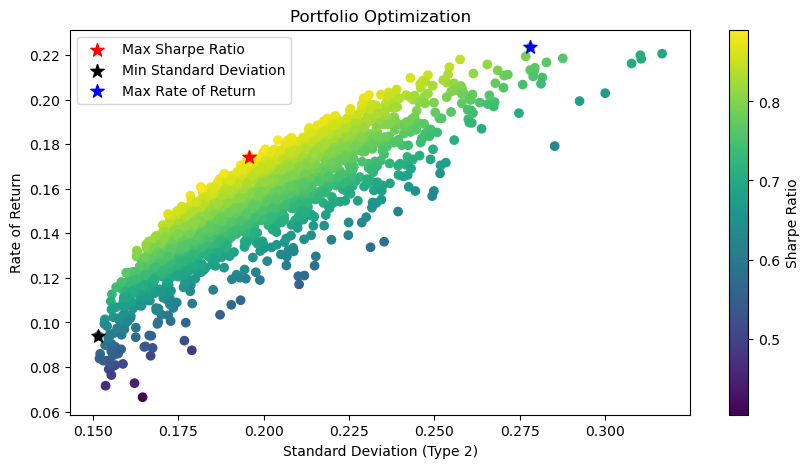

In [80]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=(10, 5))
plt.scatter(portfolio_results['Standard Deviation (Type 2)'],portfolio_results['Rate of Return'],c=portfolio_results['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation (Type 2)')
plt.ylabel('Rate of Return')

plt.scatter(portfolio_results.loc[max_sharpe_idx,'Standard Deviation (Type 2)'],
            portfolio_results.loc[max_sharpe_idx,'Rate of Return'],
            color='red', marker='*', s=100,label='Max Sharpe Ratio')

plt.scatter(portfolio_results.loc[min_std_idx,'Standard Deviation (Type 2)'],
             portfolio_results.loc[min_std_idx,'Rate of Return'],
             color='black', marker='*', s=100, 
             label='Min Standard Deviation')

plt.scatter(portfolio_results.loc[max_ror_idx,
            'Standard Deviation (Type 2)'],
            portfolio_results.loc[max_ror_idx,
            'Rate of Return'],color='blue', marker='*', s=100,
            label='Max Rate of Return')

plt.legend()
plt.title('Portfolio Optimization')
plt.show()

In [82]:
from scipy.optimize import minimize 
# Function to calculate portfolio return
def portfolio_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252

# Function to calculate portfolio volatility
def portfolio_volatility(weights, log_returns):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

# Function to maximize RoR (minimize negative return)
def minimize_negative_return(weights, log_returns):
    return -portfolio_return(weights, log_returns)

# Function to minimize standard deviation
def minimize_volatility(weights, log_returns):
    return portfolio_volatility(weights, log_returns)

# Function to maximize Sharpe Ratio (minimize negative Sharpe)
def minimize_negative_sharpe(weights, log_returns):
    return - (portfolio_return(weights, log_returns)/ portfolio_volatility(
        weights, log_returns))

# General function to optimize the portfolio
def optimize_portfolio(log_returns, objective_function, min_ror = None, max_vol=None):
    num_assets = len(log_returns.columns)
    constraints = [{'type':'eq','fun':lambda x: np.sum(x)-1}]
    if min_ror is not None:
        constraints.append({'type':'ineq','fun' : lambda x: portfolio_return(x, log_returns)-min_ror})
    if max_vol is not None:
        constraints.append({'type':'ineq', 'fun': lambda x: max_vol - portfolio_volatility(x,
                                                                                          log_returns)})
    bounds = tuple((0,1) for _ in range(num_assets))
    initial_guess = num_assets * [1. / num_assets,]
    opt_results = minimize(objective_function, initial_guess, args = (log_returns,), method='SLSQP',
    constraints = constraints)
    formatted_weights = [f"{weights:2f}" for weights in opt_results.x]
    print("Optimal Weights: ", formatted_weights)
    print(f"ROR: {portfolio_return(opt_results.x,log_returns):.2f}")
    print(f"Volatility: {portfolio_volatility(opt_results.x, log_returns):.2f}")
    print()
    return opt_results

In [84]:
log_returns = np.log(df['Close'][portfolio_tickers] / df['Close'][portfolio_tickers].shift(1))
print(portfolio_tickers)

print("Mathematical Optimization Results")
print("Optimize for maximum Sharpe Ratio:")

math_sharpe = optimize_portfolio(log_returns,minimize_negative_sharpe) 
print("Optimize for maximum RoR:")

math_ror = optimize_portfolio(log_returns, minimize_negative_return)
print("Optimize for minimum Volatility:")

math_vol = optimize_portfolio(log_returns,minimize_volatility)
print("Optimize for max RoR with max Volatility constraint of 0.4")

max_vol_constraint = 0.4  # Example maximum volatility
optimal_max_ror = optimize_portfolio(log_returns, 
                                     minimize_negative_return,
                                     max_vol=max_vol_constraint)
print("Optimize for min Volatility with min RoR constraint of 0.1")
min_ror_constraint = 0.1  # Example minimum rate of return

optimal_min_vol = optimize_portfolio(log_returns,
                                     minimize_volatility,
                                     min_ror=min_ror_constraint)

['FTNT', 'BKR', 'PCAR', 'KDP', 'MDLZ']
Mathematical Optimization Results
Optimize for maximum Sharpe Ratio:
Optimal Weights:  ['0.223360', '0.226579', '0.536044', '-0.552413', '0.566429']
ROR: 0.24
Volatility: 0.25

Optimize for maximum RoR:
Optimal Weights:  ['171428227.175150', '90895631.531039', '36173837.604782', '-199110759.790098', '-99386929.759228']
ROR: 58126341.20
Volatility: 92394739.16

Optimize for minimum Volatility:
Optimal Weights:  ['0.004363', '0.081739', '0.117017', '0.358502', '0.438378']
ROR: 0.09
Volatility: 0.15

Optimize for max RoR with max Volatility constraint of 0.4
Optimal Weights:  ['0.406628', '0.348438', '0.887308', '-1.315643', '0.673269']
ROR: 0.37
Volatility: 0.40

Optimize for min Volatility with min RoR constraint of 0.1
Optimal Weights:  ['0.023679', '0.094544', '0.153425', '0.278875', '0.449477']
ROR: 0.10
Volatility: 0.15



In [96]:
for p in [portfolio3_tickers]:
    w = np.random.random(len(p))
    w /= np.sum(w)

In [102]:
# Simulation results
print("Simulation Optimal Results")
max_sharpe_idx = portfolio_results['Sharpe Ratio'].idxmax()
max_ror_idx = portfolio_results['Rate of Return'].idxmax()
min_vol_idx = portfolio_results['Standard Deviation (Type 2)'].idxmin()

sim_weights_sharpe = portfolio_results.loc[max_sharpe_idx, 'Weights']
sim_weights_ror = portfolio_results.loc[max_ror_idx, 'Weights']
sim_weights_vol = portfolio_results.loc[min_vol_idx, 'Weights']

for w in [sim_weights_sharpe, sim_weights_ror,sim_weights_vol]:
     print("Weights: ", [f"{weight:.2f}" for weight in w])
     print(f"RoR: {portfolio_return(w,log_returns):.2f}")
     print(f"Volatility: {portfolio_volatility(w, log_returns):.2f}")
     print()

Simulation Optimal Results
Weights:  ['0.17', '0.23', '0.31', '0.01', '0.27']
RoR: 0.17
Volatility: 0.20

Weights:  ['0.45', '0.29', '0.23', '0.03', '0.00']
RoR: 0.22
Volatility: 0.28

Weights:  ['0.00', '0.10', '0.16', '0.33', '0.41']
RoR: 0.09
Volatility: 0.15

